In [17]:
df.head()

,날짜,상품1,상품2,상품3
0,2019-01-01,48,48,50
1,2019-01-02,48,44,49
2,2019-01-03,48,54,50
3,2019-01-04,53,42,48
4,2019-01-05,46,42,50


In [18]:
df['날짜'].str.split('-', expand = True).head()

,0,1,2
0,2019,01,01
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,05


In [19]:
df['월'] = df['날짜'].str.split('-', expand = True).iloc[:, 1]

In [20]:
df.head()

,날짜,상품1,상품2,상품3,월
0,2019-01-01,48,48,50,01
1,2019-01-02,48,44,49,01
2,2019-01-03,48,54,50,01
3,2019-01-04,53,42,48,01
4,2019-01-05,46,42,50,01


([<matplotlib.axis.XTick at 0x232fabf58b0>,
 [Text(0, 0, '1월'),
  Text(0, 0, '2월'),
  Text(0, 0, '3월'),
  Text(0, 0, '4월'),
  Text(0, 0, '5월'),
  Text(0, 0, '6월'),
  Text(0, 0, '7월'),
  Text(0, 0, '8월'),
  Text(0, 0, '9월'),
  Text(0, 0, '10월'),
  Text(0, 0, '11월'),
  Text(0, 0, '12월')])

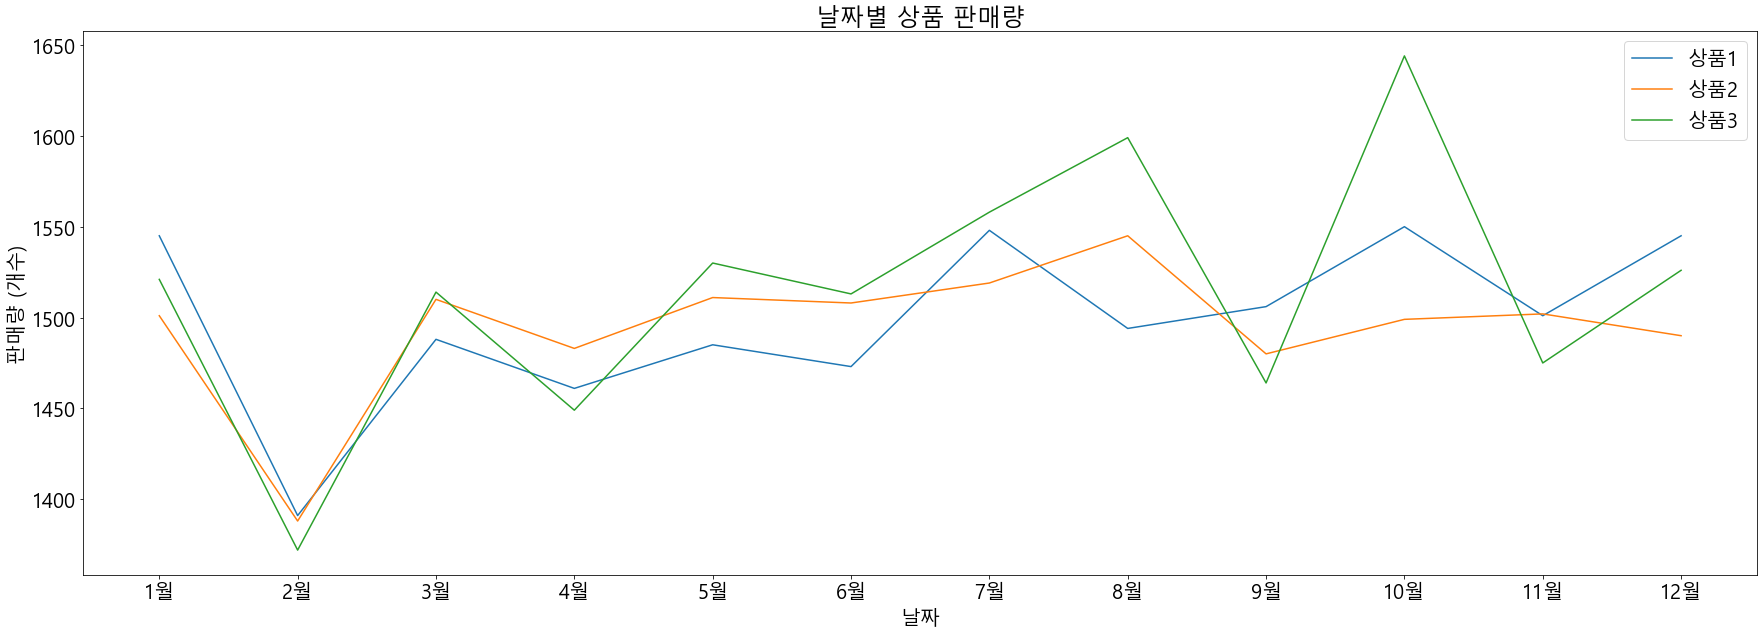

In [25]:
df.groupby('월')[['상품1','상품2','상품3']].sum().plot()
plt.title('날짜별 상품 판매량')
plt.xlabel('날짜')
plt.ylabel("판매량 (개수)")
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)])

In [26]:
df = pd.read_csv('판매실적통합본.csv', engine = 'python')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [27]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)

In [28]:
'1' + '2'

'12'

In [29]:
df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
df['분기'].head()

0    2016-1분기
1    2016-1분기
2    2016-1분기
3    2016-1분기
4    2016-1분기
Name: 분기, dtype: object

In [30]:
grouped_df = df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()
grouped_df

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


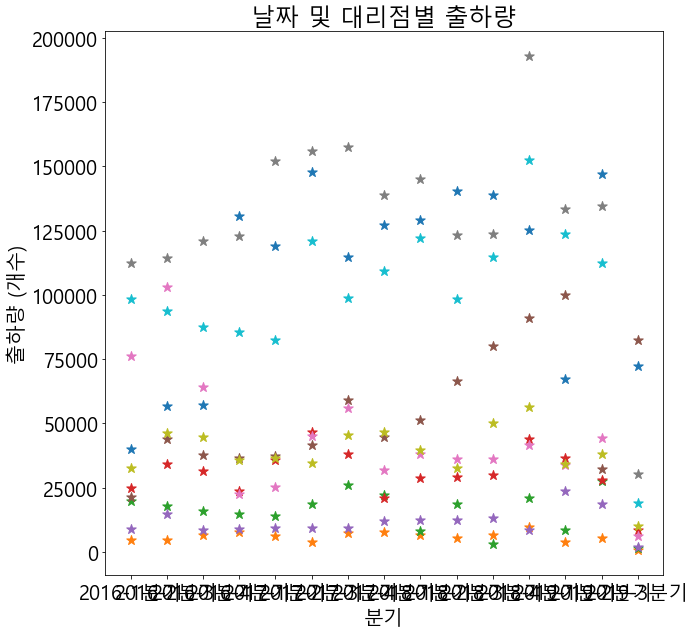

In [35]:
plt.title('날짜 및 대리점별 출하량')
plt.xlabel('분기')
plt.ylabel('출하량 (개수)')
xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()
plt.xticks(xtick_range, xtick_label)
for agent in grouped_df['대리점'].unique():
    cond = grouped_df['대리점'] == agent
    plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 100, marker = '*')

In [33]:
xtick_label = grouped_df['분기'].unique()
xtick_label

array(['2016-1분기', '2016-2분기', '2016-3분기', '2016-4분기', '2017-1분기',
       '2017-2분기', '2017-3분기', '2017-4분기', '2018-1분기', '2018-2분기',
       '2018-3분기', '2018-4분기', '2019-1분기', '2019-2분기', '2019-3분기'],
      dtype=object)

In [34]:
xtick_range = range(len(grouped_df['분기'].unique()))
xtick_range

range(0, 15)

In [36]:
grouped_df.head() 


,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010


In [38]:
pivot_df = pd.pivot_table(data = grouped_df, values = '수량', index = '분기', columns = '대리점', aggfunc = 'sum')
pivot_df = pivot_df.add_suffix("_출하량") # 대리점명이 전부 컬럼으로 되기 때문에, suffix를 추가시킴

pivot_df

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569
2017-2분기,147784,3780,18633,46604,9357,41749,45136,155935,34654,120782
2017-3분기,114819,7356,25919,37974,9397,59254,56074,157376,45479,98911
2017-4분기,126994,7853,22245,21024,11952,44728,31915,138685,46461,109366
2018-1분기,129271,6554,8176,28597,12280,51422,38133,144976,39479,121972


In [39]:
pivot_df['분기'] = list(range(len(pivot_df))) # x축에 쓰기 위해 임의의 변수를 생성함
pivot_df['분기'].head()

분기
2016-1분기    0
2016-2분기    1
2016-3분기    2
2016-4분기    3
2017-1분기    4
Name: 분기, dtype: int64

In [43]:
list(range(len(pivot_df)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

([<matplotlib.axis.XTick at 0x23280fa44f0>,
 [Text(0, 0, '2016-1분기'),
  Text(0, 0, '2016-2분기'),
  Text(0, 0, '2016-3분기'),
  Text(0, 0, '2016-4분기'),
  Text(0, 0, '2017-1분기'),
  Text(0, 0, '2017-2분기'),
  Text(0, 0, '2017-3분기'),
  Text(0, 0, '2017-4분기'),
  Text(0, 0, '2018-1분기'),
  Text(0, 0, '2018-2분기'),
  Text(0, 0, '2018-3분기'),
  Text(0, 0, '2018-4분기'),
  Text(0, 0, '2019-1분기'),
  Text(0, 0, '2019-2분기'),
  Text(0, 0, '2019-3분기')])

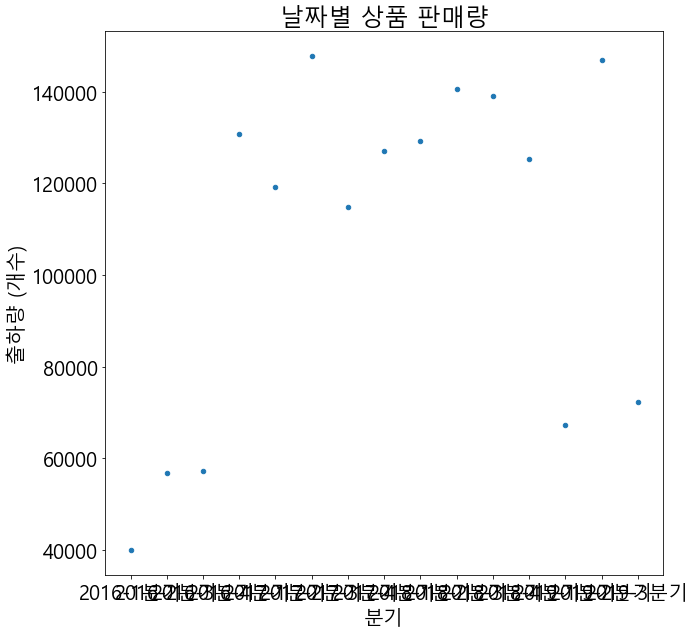

In [44]:
# 그래프 기본 설정
pivot_df.plot(kind = 'scatter', x = '분기', y = '대리점 1_출하량')
plt.title("날짜별 상품 판매량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')

In [2]:
df = pd.read_csv('판매실적통합본.csv', engine = 'python')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [4]:
# 제품군별 수량 합계 계산
grouped_df1 = df.groupby(['제품군'], as_index = False)['수량'].sum()
grouped_df1

,제품군,수량
0,제품 1,2690307
1,제품 2,4223384
2,제품 3,531946
3,제품 4,277193
4,제품 5,126323
5,제품 6,262774


In [5]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

<BarContainer object of 6 artists>

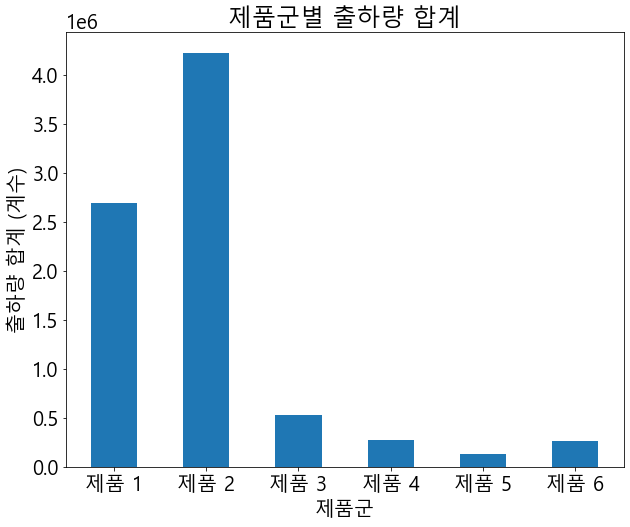

In [6]:
# 제품군별 출하량 합계 계산
plt.title('제품군별 출하량 합계')
plt.xlabel('제품군')
plt.ylabel('출하량 합계 (계수)')
plt.bar(grouped_df1['제품군'], grouped_df1['수량'], width = 0.5)

In [7]:
plt.rcParams["figure.figsize"] = (40, 15)
grouped_df2 = df.groupby(['제품군', '년도(year)'], as_index = True)['수량'].sum()
grouped_df2

제품군   년도(year)
제품 1  2016         637130
      2017         763450
      2018         807846
      2019         481881
제품 2  2016        1029868
      2017        1215031
      2018        1307538
      2019         670947
제품 3  2016         134693
      2017         154208
      2018         157031
      2019          86014
제품 4  2016          56774
      2017          82124
      2018          83692
      2019          54603
제품 5  2016          30142
      2017          36363
      2018          39851
      2019          19967
제품 6  2016          41612
      2017          64722
      2018          85157
      2019          71283
Name: 수량, dtype: int64

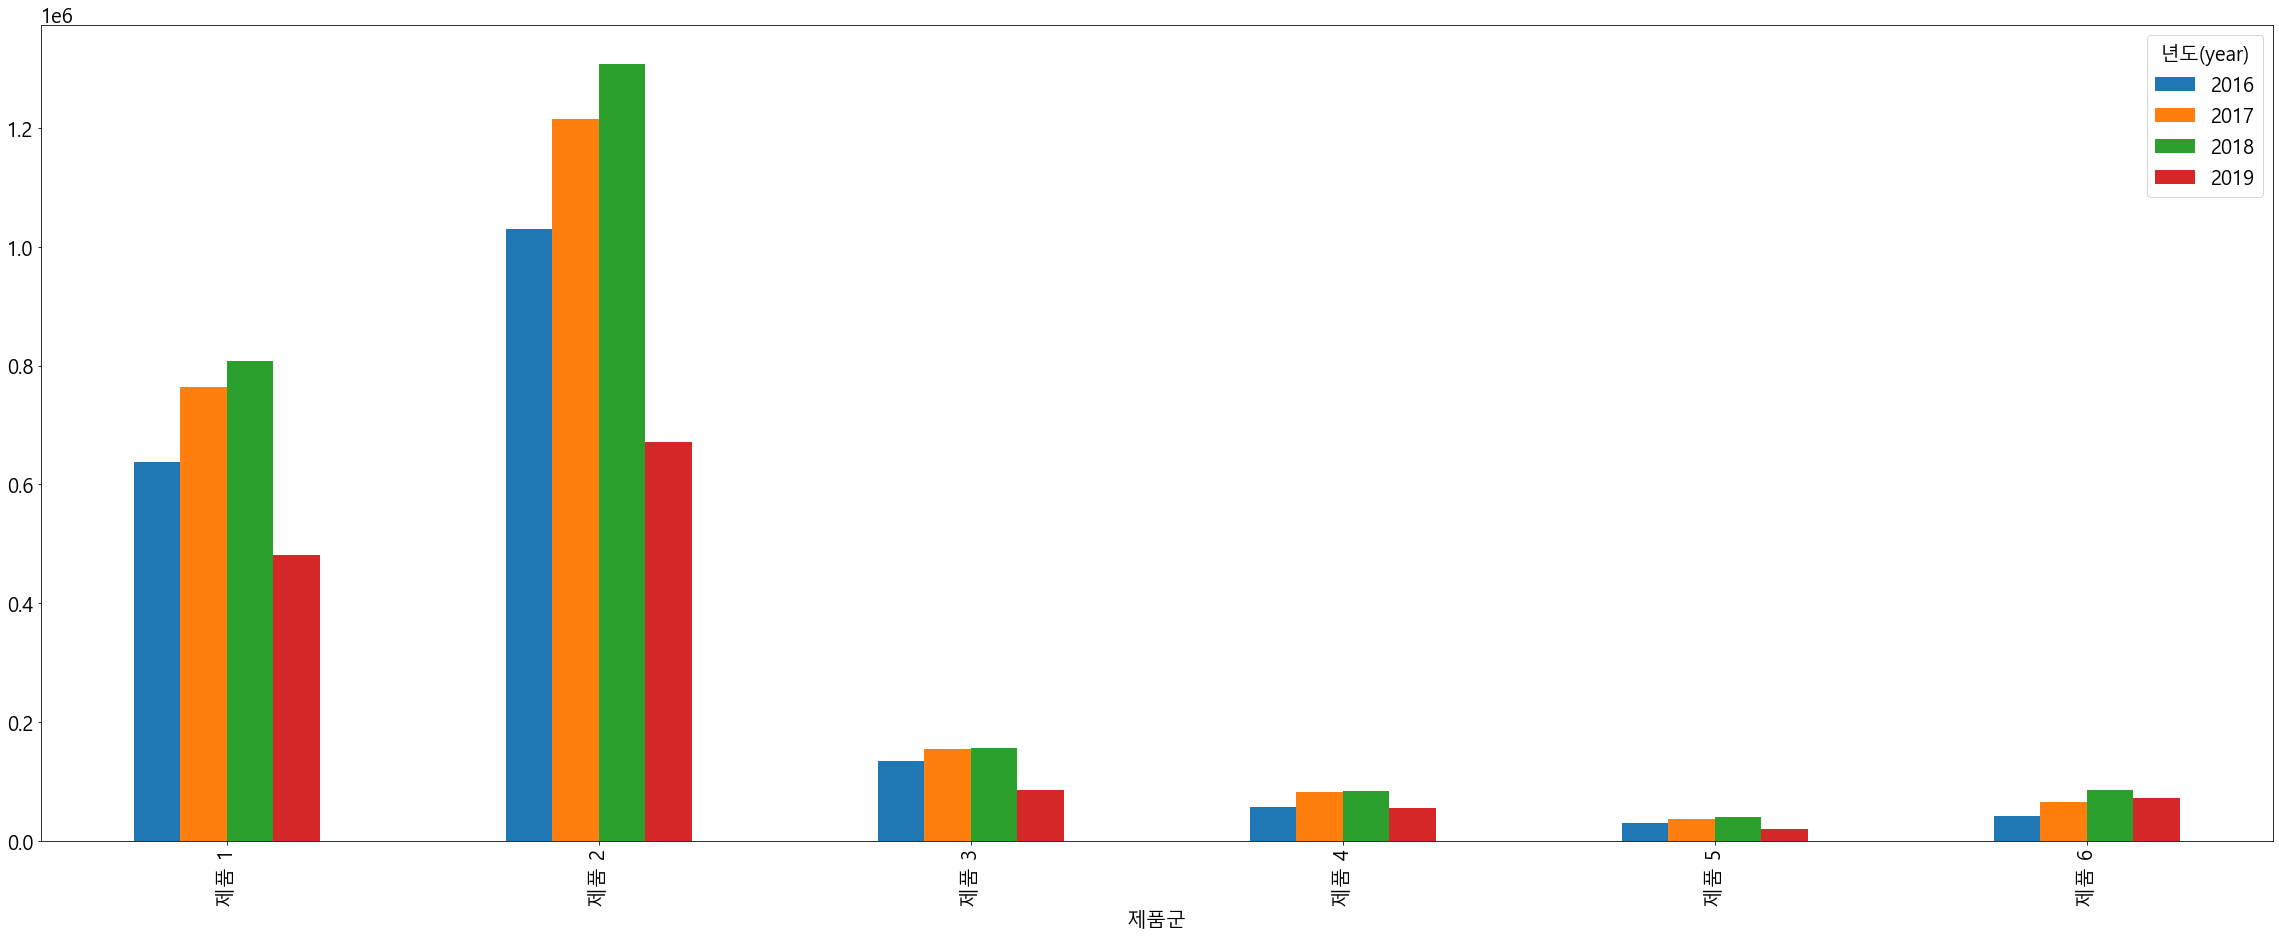

In [11]:
grouped_df2.unstack().plot(kind = 'bar')

In [12]:
grouped_df1.sort_values(by = '수량')['수량']

4     126323
5     262774
3     277193
2     531946
0    2690307
1    4223384
Name: 수량, dtype: int64

In [13]:
other_row = pd.DataFrame({"제품군":['기타'], 
                          '수량':[grouped_df1.sort_values(by = '수량')['수량'].iloc[:4].sum()]})
other_row

,제품군,수량
0,기타,1198236


In [14]:
grouped_df = pd.concat([grouped_df1, other_row], axis = 0, ignore_index = True)
grouped_df = grouped_df.sort_values(by = '수량', ascending = False).iloc[:3]
grouped_df

,제품군,수량
1,제품 2,4223384
0,제품 1,2690307
6,기타,1198236


([<matplotlib.patches.Wedge at 0x1e4412b3070>,
 [Text(-0.019438006431517805, 0.29936961085916564, '제품 2'),
  Text(-0.11660851500795197, -0.27640993872804254, '제품 1'),
  Text(0.2682736687188585, -0.13427300053295957, '기타')],
 [Text(-0.03887601286303561, 0.5987392217183313, '52.1%'),
  Text(-0.23321703001590394, -0.5528198774560851, '33.2%'),
  Text(0.536547337437717, -0.26854600106591914, '14.8%')])

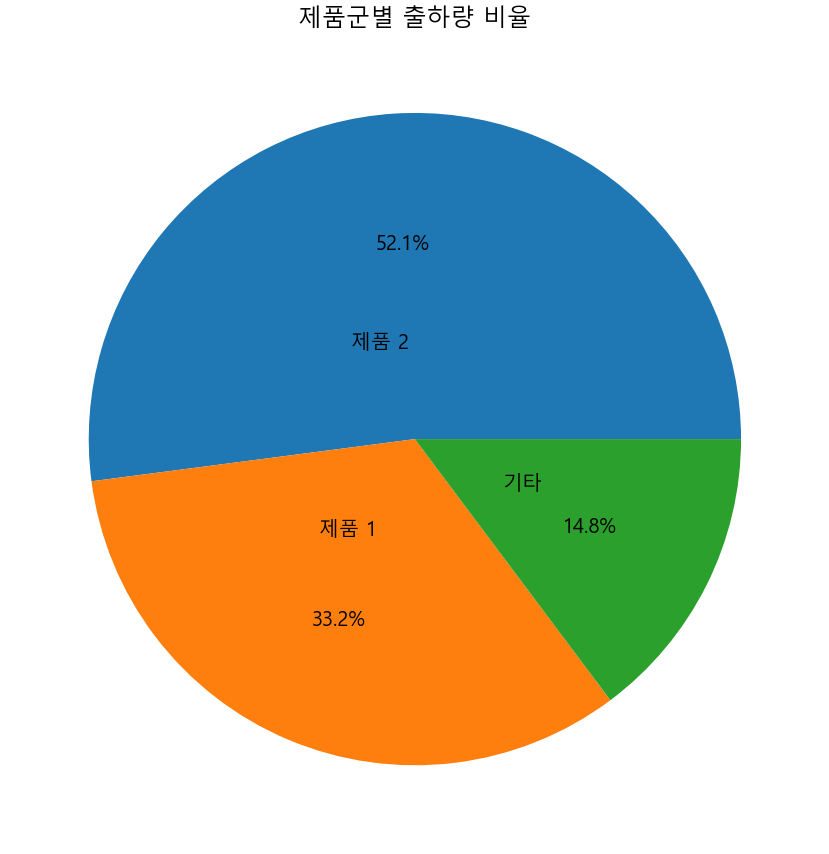

In [15]:
# 제품군별 출하량 합계 계산
plt.title("제품군별 출하량 비율")

plt.pie(x = grouped_df['수량'],
        labels = grouped_df['제품군'],
       labeldistance = 0.3,
       autopct = '%1.1f%%')

In [16]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')


plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (15, 8)

In [17]:
df = pd.read_csv('온라인_판매기록.csv', engine = 'python')
df.head()

,쇼핑몰,제품,수량,판매금액,쇼핑몰 유형
0,쿠팡,제품_16,8,1134400,쿠팡
1,쿠팡,제품_57,8,439200,쿠팡
2,쿠팡,제품_25,4,495200,쿠팡
3,쿠팡,제품_18,4,578000,쿠팡
4,쿠팡,제품_90,2,75000,쿠팡


In [18]:
df['쇼핑몰'].unique()

array(['쿠팡', '위메프', '주식회사 펫츠비', '밍키스맘', '[고양]다니엘동물병원', '강아지왕국', '개명동물병원',
       '주식회사 펫뱅크', '독스파파', '퍼피아쇼핑몰', '텐바이텐', '1300k', '이리온 동물병원(청담점)',
       '까페멍', 'GALAXYPET', '아모르디', '[안산]미유펫', '유집사네개들', '선진펫', '자인 멍멍이네',
       '[경남 진주] 야옹아 멍멍해봐', '빅브라더', '스누피동물병원', '펫앤비코리아', '펫누리(펫클럽)',
       '멍냥이네', '컴패니언', '인터펫코리아', '오독오독', '딩동이네', '도꾸도꾸', '수호동물병원', '코코마펫',
       '그린펫', '코리아대동', '데일리독', '줄서는집', '폴리파크', 'KPET', '올라인', '펫스토어',
       'Kopet', 'US글로벌', '[대리점]빛돌 커뮤니케이션', '신세계이마트', '아이꾸러미', '하나유통',
       '올치', '에스이랜드', '위더스(윈리엔)', '펫모두(누리보듬)', '애니피아동물병원', 'POOM(아트박스)',
       '인브로스', '딱펫', '메리멍', '펫프렌즈', '강아지대통령', '펫클럽(남양주)', '엔빵',
       '[대리점]수진유통', '오렌지펫', '라임동물병원', '더독몰-반포샵', '도그씨', '기프트펫', '카카오선물하기',
       '(주)신일코리아아울렛펫코', '강사모 백화점 원종점', '강아지와요와요', '애니펫동물병원(수지)',
       '이리온동물병원(판교)', '나라애견', '도그스푼', '아로하플라워', '아트박스 오프라인', '에버펫동물병원',
       '속초애견프라자', '마곡나무동물병원', '몬스터펫샵 분당오포좀', '리오펫', '모모펫살롱', '워킹펫',
       '펫하우스', '이쁘개귀엽냥', '헬로아이엠', '파트라슈', '드림동물병원', '금천 24시 k동물의료센터',
       '아프지

In [19]:
X = df.groupby('쇼핑몰 유형')['판매금액'].apply(list)
X

쇼핑몰 유형
동물병원      [338400, 202600, 238800, 1088000, 135800, 8768...
온라인II     [400800, 586600, 291900, 654000, 684000, 40400...
온라인사이트    [10400, 631400, 516400, 318000, 300000, 306600...
유통대리점     [220200, 10100, 112500, 56000, 236600, 928900,...
전시회       [498000, 195300, 143500, 478200, 358400, 10731...
쿠팡        [1134400, 439200, 495200, 578000, 75000, 19550...
할인점       [39100, 670400, 1533000, 438400, 403200, 19250...
할인점II     [119100, 101300, 124200, 101400, 291900, 37350...
Name: 판매금액, dtype: object

([<matplotlib.axis.XTick at 0x1e43de1a670>,
 [Text(0, 0, '동물병원'),
  Text(0, 0, '온라인II'),
  Text(0, 0, '온라인사이트'),
  Text(0, 0, '유통대리점'),
  Text(0, 0, '전시회'),
  Text(0, 0, '쿠팡'),
  Text(0, 0, '할인점'),
  Text(0, 0, '할인점II')])

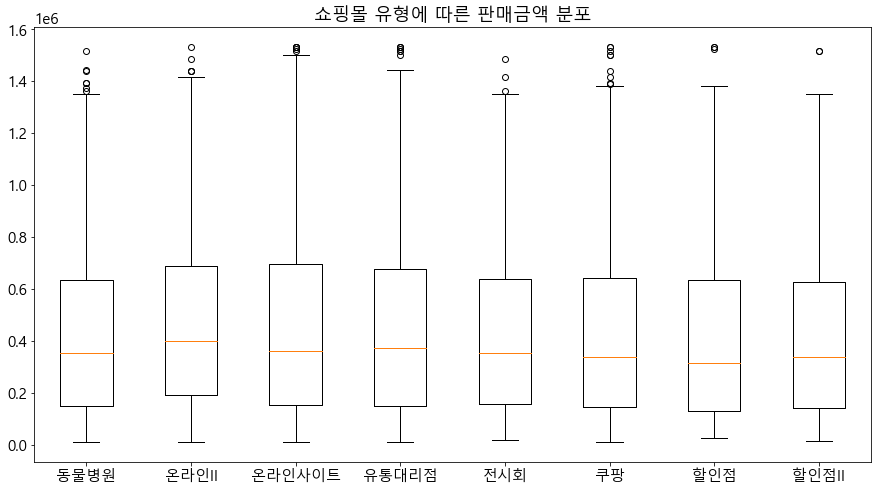

In [21]:
plt.title('쇼핑몰 유형에 따른 판매금액 분포')
plt.boxplot(X.values)
plt.xticks(np.arange(1,len(X)+1), X.index)

In [22]:
# DataFrame method를 이용한 boxplot 그리기
df = pd.DataFrame({"실험1": np.random.normal(10, 2, size = 100),
                  "실험2": np.random.normal(8, 3, size = 100),
                  "실험3": np.random.normal(9, 4, size = 100)})

df.head()

,실험1,실험2,실험3
0,10.302872,12.267735,7.830711
1,12.308751,13.808464,11.383059
2,13.255124,12.114200,16.324624
3,11.347572,8.090203,8.917121
4,9.901972,8.778033,7.508750


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


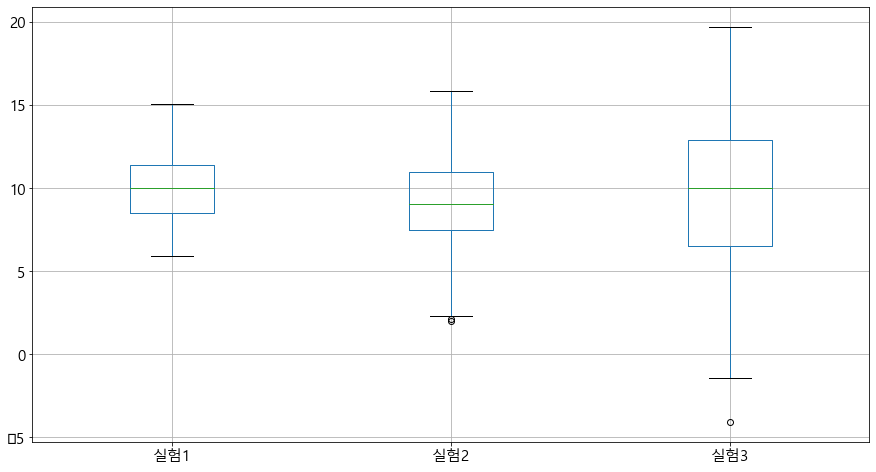

In [23]:
df.boxplot(column = ['실험1', '실험2', '실험3'])